# Pandas

在資料處理與視覺化中，我們經常以pandas來操作EXCEL、CSV類型的資料。  
Pandas 開發於2008年，最初的目的是為了快速處理金融相關資料，讓非程式相關人員能快速分析資料，因此使用上偏向簡潔式API  
在後來AI盛行，更是增加了對row column的快速操作方便AI人員做資料的預處理


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.inf) # numpy 陣列完整輸出
# pandas 顯示所有 columns
pd.set_option('display.max_columns', None)
# pandas 顯示所有 rows
pd.set_option('display.max_rows', None)


csv = pd.read_csv('datasets/housing.csv')
csv.head(5) # 顯示前5筆資料方便粗略查看


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


經過初略的察看我們大概知道資料的樣式，但是我們需要更多的資訊，例如: 資料的類型、資料筆數、有無缺失及異常值  
我們會透過 pd.info() 觀看
觀看後會發現
1. CSV中的String在pandas中多以object方式表現，使用者也可以自行轉str類型
2. total_bedrooms 發現not null value僅 20433筆 Data entries卻有20640筆，有部分資料缺失了


In [2]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Data Preprocess
對於缺失或異常值，這是天然資料中非常常見的現象，資料不可能像MNIST等資料集如此完美，
因此我們勢必要對資料做一些處理，對NAN值的修正或異常值得清理動作  
我們先透過pd.describe() 觀看std min, max, mean等值確認我們接下來的修正步驟  



In [3]:
csv.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 相關係數

如果資料集不是很大，我們可以列出他的相關係數來做為參考

In [4]:
corr = csv.corr()
print('## INFO: 顯示與房價的皮爾遜相關係數: ')
corr['median_house_value'].sort_values(ascending=False)

## INFO: 顯示與房價的皮爾遜相關係數: 


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## 資料視覺化

對於數字，人類總是理解的沒有看圖來的快，所以我們可以用Pandas提供的一些方法  
幫助我們把資料視覺化，更快理解資料的樣貌

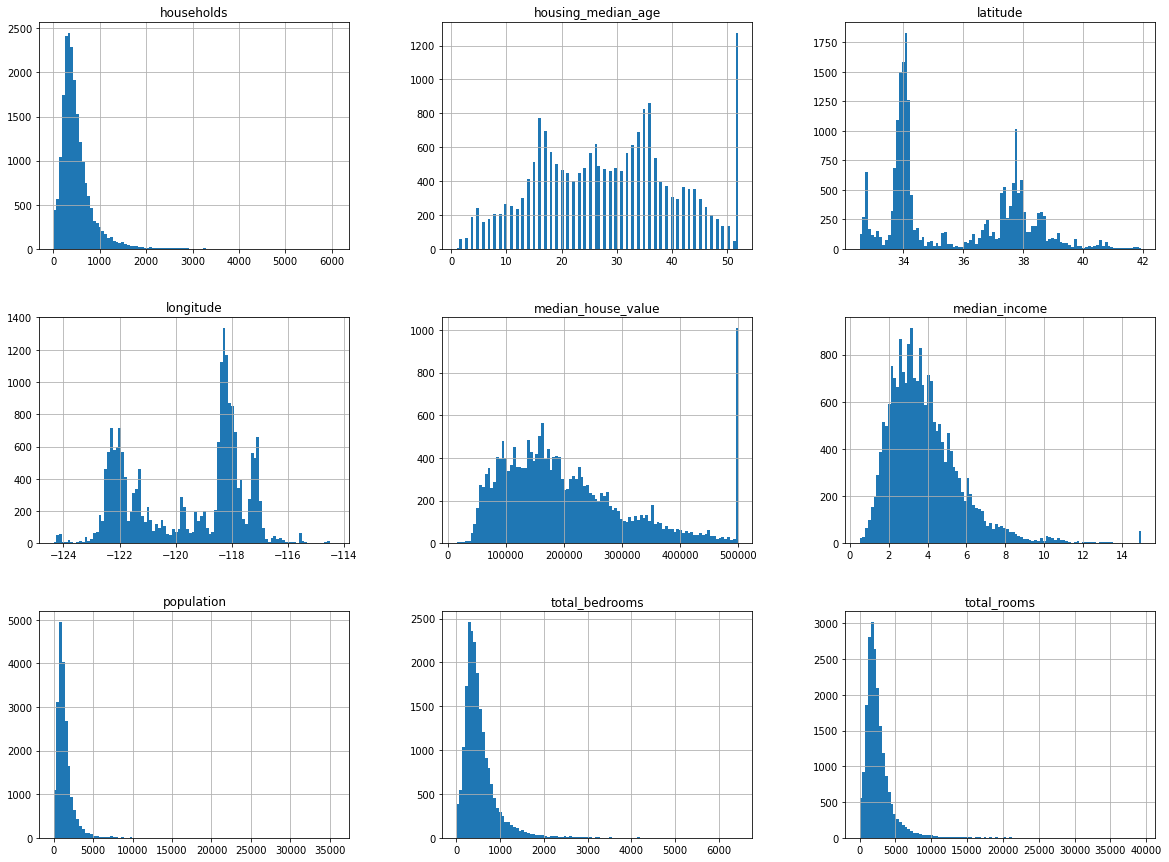

In [5]:
import matplotlib.pyplot as plt



# bins: X軸要切分多少條直方圖等分
# figsize: 圖片大小
csv.hist(bins=100, figsize=(20, 15))
plt.show()

圖形與相關細訴告訴我們一些事
* median house value 與 median income 有著高度相關性
* 取得的資料多以靠近岸邊的資料居多
* median house value 似乎與人口數量不太相關，與地理位置有部分關聯(部分海岸邊較貴)

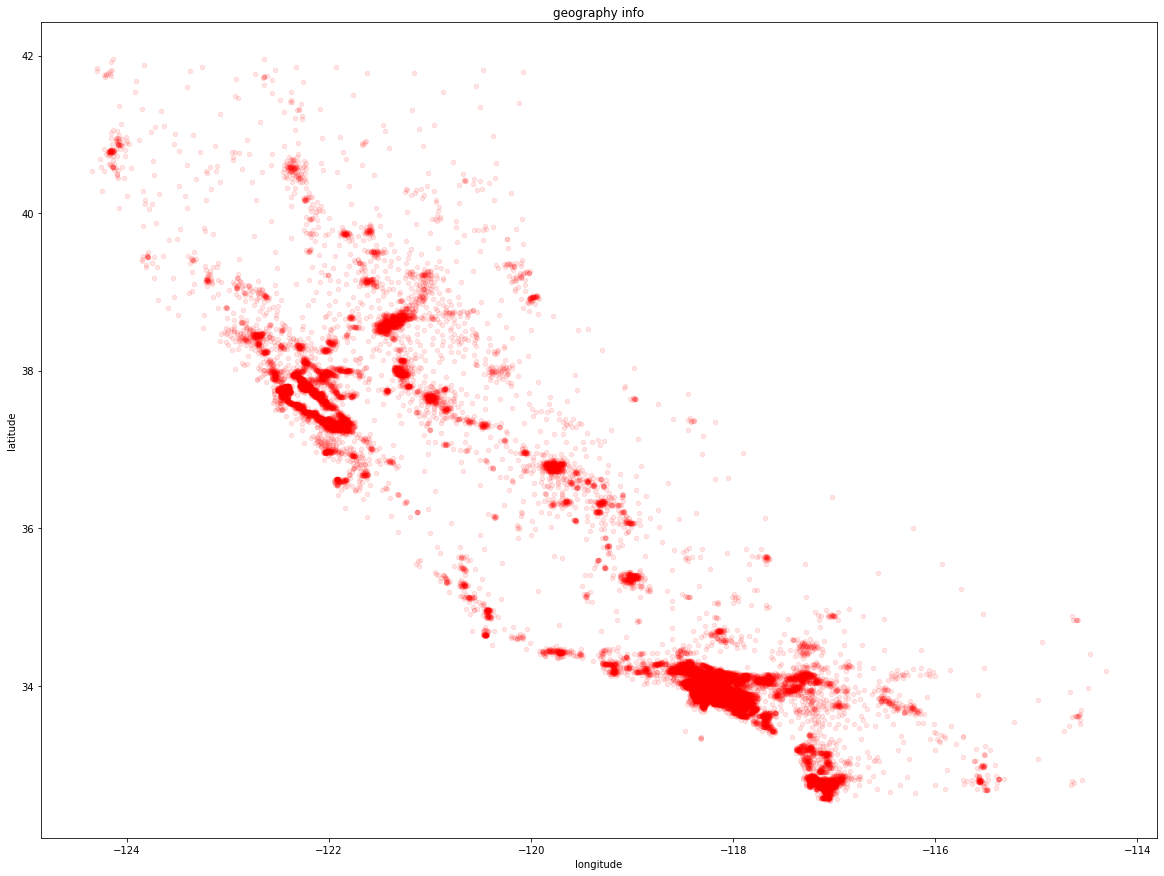

In [6]:
# 以經緯度顯示資料分布狀況
csv.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, color='red', figsize=(20, 15))
plt.title('geography info')
plt.show()

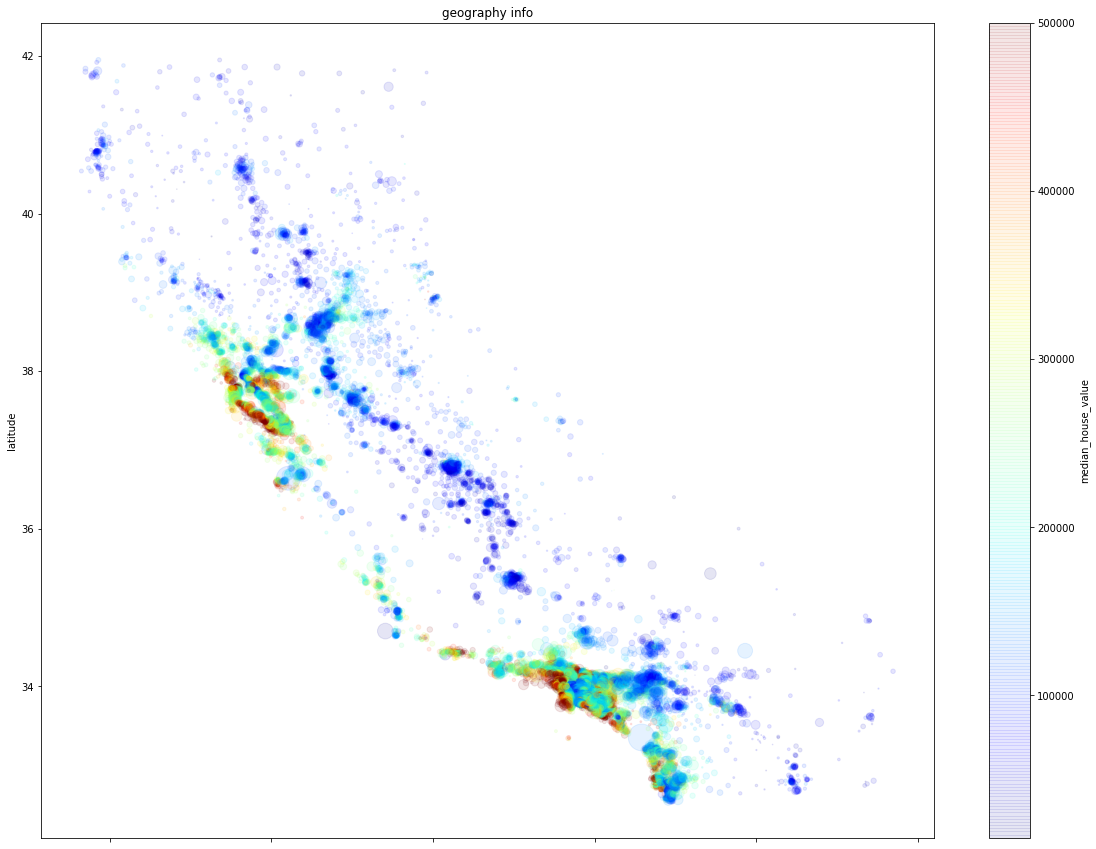

In [7]:
# 顯示人口與房價中位數分布關係
# s: 點點大小
# c: 顏色漸層 jet: 色溫由藍至紅
csv.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, figsize=(20, 15),
         s = csv['population']/50,
         c = 'median_house_value', cmap=plt.get_cmap('jet'), colorbar = True)
plt.title('geography info')
plt.show()

# 合成更高相關性特徵量

在傳統機器學習中，如何提高資料的質量事一件很重要的事，如果資料特徵不夠明顯可能導致訓練不佳或者過擬合現象
有時候我們可以把不同的特徵嘗試合成，提供更高度相關的特徵幫助訓練

在下方我直接顯示了新的合成特徵 (total_rooms)/(total_bedrooms)，相關度遠高於原本相關係數相加
也許是通常高價位的房子客房數量都特別多，而單純的房間總量或者臥室總量並沒有什麼參考價值

In [8]:
csv['rooms_per_bedrooms'] = csv['total_rooms']/csv['total_bedrooms']
corr = csv.corr()
print('## INFO: 顯示與房價的皮爾遜相關係數: ')
corr['median_house_value'].sort_values(ascending=False)

## INFO: 顯示與房價的皮爾遜相關係數: 


median_house_value    1.000000
median_income         0.688075
rooms_per_bedrooms    0.383920
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

# NAN值 處理總結

統合上述結果，我們對NAN值通常有3種操作

1. 刪除所有資料的該筆特徵不予以使用 pd.dropna(subset=['total_bedrooms'], inplace=True)
2. 刪除有缺項的筆數 pd.dropna(labels='total_bedrooms', inplace=True)
3. 填充NAN值， 填充策略可以自由發揮，通常都是填 0 或 平均值 pd.fillna(0)

考量到total bedrooms 相關係數真的很低，我們傾向於刪除該特徵量，但是我們的新合成特徵 rooms_per_bedrooms 的相關度
非常高，刪除有缺項的筆數或填充NAN值會是相對較好的選擇  
我這裡選擇刪除缺失項

In [9]:
csv.dropna(subset=['total_bedrooms', 'rooms_per_bedrooms'], inplace=True)
csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
 10  rooms_per_bedrooms  20433 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


# 異常值處理

在天然資料中會有一些異常值或稱之為噪訊，異常值產生原因很多，有的是精準度失誤、有的是人為誤差，例如省略、寫錯等等。  
這些異常值會影響我們無法清楚的看懂資料要告訴我們的規則，就如同雜訊很多的電視機，我們需要很費力的腦中處理掉這些雜訊，避免影響我們接收電視機的內容  
對於異常值處理通常分為幾種方式: 
1. 拋棄該筆資料
2. 異常值修正
3. 數值分級處理將異常值模糊化，提高容錯率

當然我們也可以要求人員重新提交資料，但有時候不是這麼簡單，在這個問題中我選擇只調整 median incom，因為它與median house value相關性最高
，其異常值對整個解決方案的破壞性最強，透過圖形我們可以看到圖形上有不自然的橫線，估計是資料人員為了方便將median house value>52萬的資料一率設為52萬，為了避免對模型產生影響(無法預測超過52萬情況)，我們選擇刪除

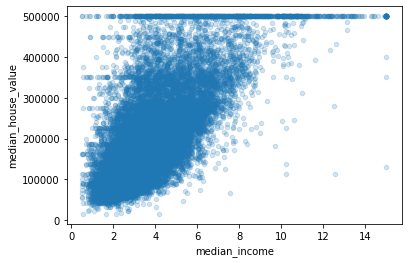

In [10]:
csv.plot(kind='scatter', x = 'median_income', y='median_house_value', alpha=0.2)

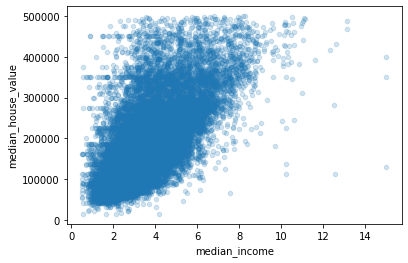

In [11]:
csv = csv[csv['median_house_value'] < 500000]
csv.plot(kind='scatter', x = 'median_income', y='median_house_value', alpha=0.2)

# 儲存資料集

在我們做完資料清理後，就可以把相對乾淨的資料儲存起來提供後續的訓練使用，我們在上面做的這些動作就是所謂的特徵工程(feature Engineering)，
特徵工程在整個機器學習佔很重的比例，尤其是模型不夠fancy的時候，完美的資料集能夠幫助你更輕鬆訓練出解決方案，甚至有些預處理能幫助你只用線性模型就能找出解。

我們這裡直接利用pandas提供的to_csv()就可儲存為csv格式

In [12]:
csv.to_csv('datasets/fixed_housing.csv')